In [7]:
# Union des df : ratings et movies

# Packages
import dask.dataframe as dd
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [9]:
# Chemin des fichiers
FC1_movieLens_Imdb_path = r'C:\Users\anacv\OneDrive\Documentos\Data Scientist\00. Projet\Data\DataFrames travaillés\2. Modélisations BD\FC1_movieLens_Imdb.feather'


In [11]:
# Lire base de données
FC1_movieLens_Imdb = pd.read_feather(FC1_movieLens_Imdb_path)
FC1_movieLens_Imdb.info()
FC1_movieLens_Imdb.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 6 columns):
 #   Column              Dtype  
---  ------              -----  
 0   userId              int64  
 1   imdbId              int64  
 2   rating              float64
 3   title_name          string 
 4   imdb_averageRating  float64
 5   imdb_numVotes       Int64  
dtypes: Int64(1), float64(2), int64(2), string(1)
memory usage: 934.6 MB


,userId,imdbId,rating,title_name,imdb_averageRating,imdb_numVotes
0,1,113497,3.5,Jumanji,7.1,384991
1,1,112682,3.5,"City of Lost Children, The (Cité des enfants p...",7.5,72399
2,1,114746,3.5,Twelve Monkeys (a.k.a. 12 Monkeys),8.0,654005
3,1,114369,3.5,Seven (a.k.a. Se7en),8.6,1839918
4,1,114814,3.5,"Usual Suspects, The",8.5,1161903


In [15]:
# Missing percentage
missing_percentage = FC1_movieLens_Imdb.isnull().mean()*100
missing_columns = missing_percentage[missing_percentage > 0]
print ('missing_columns_prctg :', missing_columns)
print('\n')

missing_columns_prctg : imdb_averageRating    0.077814
imdb_numVotes         0.077814
dtype: float64




In [17]:
# Vérifier les doublons
FC1_movieLens_Imdb[FC1_movieLens_Imdb.duplicated()]

,userId,imdbId,rating,title_name,imdb_averageRating,imdb_numVotes


In [19]:
# Création de table des ratings par film pour comparaison des ratings MovieLens avec ceux d'Imdb

# MovieLens : Grouper par imdbId, la moyenne des ratings et le nombre de userId
movieLens_avg_rating = FC1_movieLens_Imdb.groupby('imdbId').agg(
    movieLens_avg_rating=('rating', 'mean'),
    user_count=('userId', 'count')
).reset_index()

#movieLens_avg_rating.head()
print(movieLens_avg_rating)

        imdbId  movieLens_avg_rating  user_count
0            5              3.375000           4
1            8              2.714286           7
2           10              4.000000           1
3           12              3.437500          16
4           14              2.250000           2
...        ...                   ...         ...
26739  4377918              2.000000           1
26740  4397346              2.375000           4
26741  4438688              4.500000           1
26742  4475970              3.333333           3
26743  4530184              2.500000           1

[26744 rows x 3 columns]


In [21]:
# Création de table des ratings par film pour comparaison des ratings Imdb avec ceux d'MovieLens


# Imdb : Grouper par imdbId, la moyenne des ratings et le nombre de userId
imdb_avg_ratings = FC1_movieLens_Imdb[['imdbId', 'imdb_averageRating', 'imdb_numVotes']].drop_duplicates().reset_index(drop=True)
print(imdb_avg_ratings)

    # Normalisation des notes Imdb
imdb_avg_ratings['imdb_rating_normalised'] = imdb_avg_ratings['imdb_averageRating']/2

imdb_avg_ratings.head()

       imdbId  imdb_averageRating  imdb_numVotes
0      113497                 7.1         384991
1      112682                 7.5          72399
2      114746                 8.0         654005
3      114369                 8.6        1839918
4      114814                 8.5        1161903
...       ...                 ...            ...
26739   56014                 6.1           1022
26740   57870                 6.8           2037
26741   54425                 7.2           2123
26742   73219                 7.3           2368
26743   79980                 7.3           3588

[26744 rows x 3 columns]


,imdbId,imdb_averageRating,imdb_numVotes,imdb_rating_normalised
0,113497,7.1,384991,3.55
1,112682,7.5,72399,3.75
2,114746,8.0,654005,4.00
3,114369,8.6,1839918,4.30
4,114814,8.5,1161903,4.25


In [23]:
# Table pour la comparaison des ratings

# Fusion des ratings moyens MovieLens et Imdb
ratings_avg_MovieLens_Imdb = pd.merge(movieLens_avg_rating, imdb_avg_ratings, how='left', on='imdbId')
ratings_avg_MovieLens_Imdb.head()

,imdbId,movieLens_avg_rating,user_count,imdb_averageRating,imdb_numVotes,imdb_rating_normalised
0,5,3.375000,4,6.2,2832,3.10
1,8,2.714286,7,5.4,2237,2.70
2,10,4.000000,1,6.8,7710,3.40
3,12,3.437500,16,7.4,13115,3.70
4,14,2.250000,2,7.1,5965,3.55


In [25]:
# Missing percentage   
missing_percentage = ratings_avg_MovieLens_Imdb.isnull().mean()*100
missing_columns = missing_percentage[missing_percentage > 0]
print ('missing_columns_prctg :', missing_columns)
print('\n')

missing_columns_prctg : imdb_averageRating        0.235567
imdb_numVotes             0.235567
imdb_rating_normalised    0.235567
dtype: float64




In [27]:
# Vérif des films sans info imdb
ratings_avg_MovieLens_Imdb[ratings_avg_MovieLens_Imdb['imdb_averageRating'].isna()]

# Commentaire
# 63 films n'ont pas des ratings imdb

,imdbId,movieLens_avg_rating,user_count,imdb_averageRating,imdb_numVotes,imdb_rating_normalised
673,24651,3.666667,3,NaN,<NA>,NaN
1888,38426,2.555556,27,NaN,<NA>,NaN
2760,46866,4.000000,1,NaN,<NA>,NaN
3902,56600,1.476923,65,NaN,<NA>,NaN
5005,64976,3.125000,4,NaN,<NA>,NaN
...,...,...,...,...,...,...
26539,3384034,3.000000,1,NaN,<NA>,NaN
26603,3534602,3.000000,1,NaN,<NA>,NaN
26634,3630276,3.695312,64,NaN,<NA>,NaN
26677,3778744,3.833333,3,NaN,<NA>,NaN


In [29]:
# Remplacement des nomVotes Imdb et ratings Imdb NaN par 0

columns_to_fill = ['imdb_averageRating', 'imdb_numVotes', 'imdb_rating_normalised']
ratings_avg_MovieLens_Imdb[columns_to_fill] = ratings_avg_MovieLens_Imdb[columns_to_fill].fillna(0)


In [31]:
# Vérif si la table continue à avoir des valeurs manquantes 
# Missing percentage
missing_percentage = ratings_avg_MovieLens_Imdb.isnull().mean()*100
missing_columns = missing_percentage[missing_percentage > 0]
print ('missing_columns_prctg :', missing_columns)
print('\n')

missing_columns_prctg : Series([], dtype: float64)




In [33]:
# Création de la somme de votes MovieLens et Imdb 
ratings_avg_MovieLens_Imdb['numVotes_ML_IMBD'] = ratings_avg_MovieLens_Imdb['user_count'] + ratings_avg_MovieLens_Imdb['imdb_numVotes']

# Création du rating ponderé global
ratings_avg_MovieLens_Imdb['rating_weighted_ML_IMBD']=(ratings_avg_MovieLens_Imdb['movieLens_avg_rating']*ratings_avg_MovieLens_Imdb['user_count'] +
ratings_avg_MovieLens_Imdb['imdb_rating_normalised']*ratings_avg_MovieLens_Imdb['imdb_numVotes'])/ratings_avg_MovieLens_Imdb['numVotes_ML_IMBD']

ratings_avg_MovieLens_Imdb.info()
ratings_avg_MovieLens_Imdb.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26744 entries, 0 to 26743
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   imdbId                   26744 non-null  int64  
 1   movieLens_avg_rating     26744 non-null  float64
 2   user_count               26744 non-null  int64  
 3   imdb_averageRating       26744 non-null  float64
 4   imdb_numVotes            26744 non-null  Int64  
 5   imdb_rating_normalised   26744 non-null  float64
 6   numVotes_ML_IMBD         26744 non-null  Int64  
 7   rating_weighted_ML_IMBD  26744 non-null  Float64
dtypes: Float64(1), Int64(2), float64(3), int64(2)
memory usage: 1.7 MB


,imdbId,movieLens_avg_rating,user_count,imdb_averageRating,imdb_numVotes,imdb_rating_normalised,numVotes_ML_IMBD,rating_weighted_ML_IMBD
0,5,3.375000,4,6.2,2832,3.10,2836,3.100388
1,8,2.714286,7,5.4,2237,2.70,2244,2.700045
2,10,4.000000,1,6.8,7710,3.40,7711,3.400078
3,12,3.437500,16,7.4,13115,3.70,13131,3.69968
4,14,2.250000,2,7.1,5965,3.55,5967,3.549564


C:\Users\anacv\AppData\Local\Temp\ipykernel_10168\1431567566.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  votes_by_rating = ratings_avg_MovieLens_Imdb.groupby('rating_category')['numVotes_ML_IMBD'].sum().sort_index()
C:\Users\anacv\AppData\Local\Temp\ipykernel_10168\1431567566.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  votes_by_rating_ML = ratings_avg_MovieLens_Imdb.groupby('rating_category_ML')['user_count'].sum().sort_index()
C:\Users\anacv\AppData\Local\Temp\ipykernel_10168\1431567566.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future

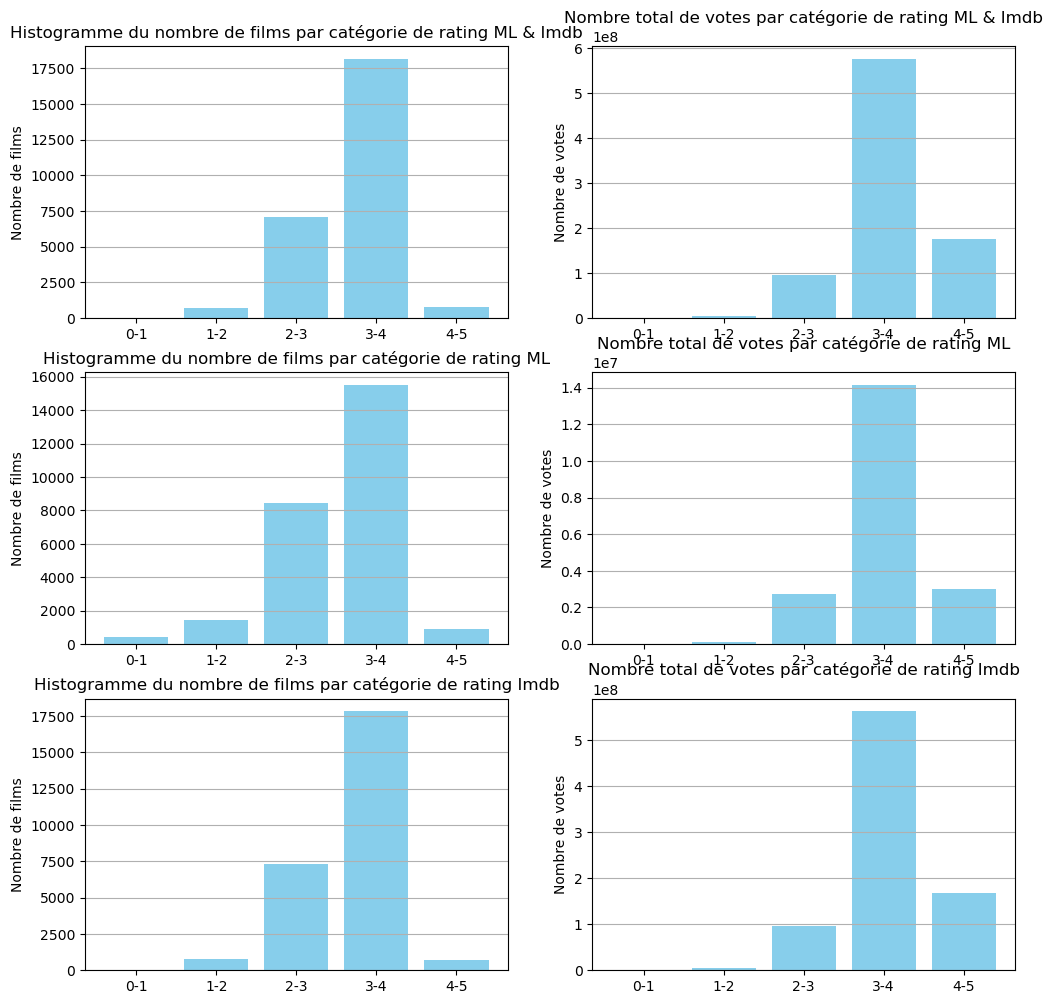

In [35]:
# Graphiques pour analyser l'impact de l'élimination des films avec des notes basses

# Créer des catégories de ratings
ratings_avg_MovieLens_Imdb['rating_category'] = pd.cut(ratings_avg_MovieLens_Imdb['rating_weighted_ML_IMBD'], bins=[0, 1, 2, 3, 4, 5], labels=['0-1', '1-2', '2-3', '3-4', '4-5'])
ratings_avg_MovieLens_Imdb['rating_category_ML'] = pd.cut(ratings_avg_MovieLens_Imdb['movieLens_avg_rating'], bins=[0, 1, 2, 3, 4, 5], labels=['0-1', '1-2', '2-3', '3-4', '4-5'])
ratings_avg_MovieLens_Imdb['rating_category_Imdb'] = pd.cut(ratings_avg_MovieLens_Imdb['imdb_rating_normalised'], bins=[0, 1, 2, 3, 4, 5], labels=['0-1', '1-2', '2-3', '3-4', '4-5'])

# Compter le nombre de films par catégorie de rating
film_counts_by_rating = ratings_avg_MovieLens_Imdb['rating_category'].value_counts().sort_index()
film_counts_by_rating_ML = ratings_avg_MovieLens_Imdb['rating_category_ML'].value_counts().sort_index()
film_counts_by_rating_Imdb = ratings_avg_MovieLens_Imdb['rating_category_Imdb'].value_counts().sort_index()

# Calculer le nombre de votes par catégorie de rating
votes_by_rating = ratings_avg_MovieLens_Imdb.groupby('rating_category')['numVotes_ML_IMBD'].sum().sort_index()
votes_by_rating_ML = ratings_avg_MovieLens_Imdb.groupby('rating_category_ML')['user_count'].sum().sort_index()
votes_by_rating_Imdb = ratings_avg_MovieLens_Imdb.groupby('rating_category_Imdb')['imdb_numVotes'].sum().sort_index()

# Créer des subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Graphiques par nombre des films
# Graphique 1.1 : ML & Imdb
axs[0, 0].bar(film_counts_by_rating.index, film_counts_by_rating, color='skyblue')
axs[0, 0].set_title('Histogramme du nombre de films par catégorie de rating ML & Imdb')
#axs[0, 0].set_xlabel('Catégorie de rating avrg par film (0-5)')
axs[0, 0].set_ylabel('Nombre de films')
axs[0, 0].grid(axis='y')

# Graphique 2.1 : ML
axs[1, 0].bar(film_counts_by_rating_ML.index, film_counts_by_rating_ML, color='skyblue')
axs[1, 0].set_title('Histogramme du nombre de films par catégorie de rating ML')
#axs[1, 0].set_xlabel('Catégorie de rating avrg par film (0-5)')
axs[1, 0].set_ylabel('Nombre de films')
axs[1, 0].grid(axis='y')

# Graphique 3.1 : Imdb
axs[2, 0].bar(film_counts_by_rating_Imdb.index, film_counts_by_rating_Imdb, color='skyblue')
axs[2, 0].set_title('Histogramme du nombre de films par catégorie de rating Imdb')
#axs[2, 0].set_xlabel('Catégorie de rating avrg par film (0-5)')
axs[2, 0].set_ylabel('Nombre de films')
axs[2, 0].grid(axis='y')

# Graphiques par nombre des votes
# Graphique 1.2 : ML & Imdb
axs[0, 1].bar(votes_by_rating.index, votes_by_rating, color='skyblue')
axs[0, 1].set_title('Nombre total de votes par catégorie de rating ML & Imdb')
#axs[0, 1].set_xlabel('Catégorie de rating avrg par film (0-5)')
axs[0, 1].set_ylabel('Nombre de votes')
axs[0, 1].grid(axis='y')

# Graphique 2.2 : ML
axs[1, 1].bar(votes_by_rating_ML.index, votes_by_rating_ML, color='skyblue')
axs[1, 1].set_title('Nombre total de votes par catégorie de rating ML')
#axs[1, 1].set_xlabel('Catégorie de rating avrg par film (0-5)')
axs[1, 1].set_ylabel('Nombre de votes')
axs[1, 1].grid(axis='y')

# Graphique 3.2 : Imdb
axs[2, 1].bar(votes_by_rating_Imdb.index, votes_by_rating_Imdb, color='skyblue')
axs[2, 1].set_title('Nombre total de votes par catégorie de rating Imdb')
#axs[2, 1].set_xlabel('Catégorie de rating avrg par film (0-5)')
axs[2, 1].set_ylabel('Nombre de votes')
axs[2, 1].grid(axis='y')

C:\Users\anacv\AppData\Local\Temp\ipykernel_10168\255695309.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  votes_by_rating = ratings_avg_MovieLens_Imdb.groupby('rating_category')['numVotes_ML_IMBD'].sum().sort_index()
C:\Users\anacv\AppData\Local\Temp\ipykernel_10168\255695309.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  votes_by_rating_ML = ratings_avg_MovieLens_Imdb.groupby('rating_category_ML')['user_count'].sum().sort_index()
C:\Users\anacv\AppData\Local\Temp\ipykernel_10168\255695309.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future ve

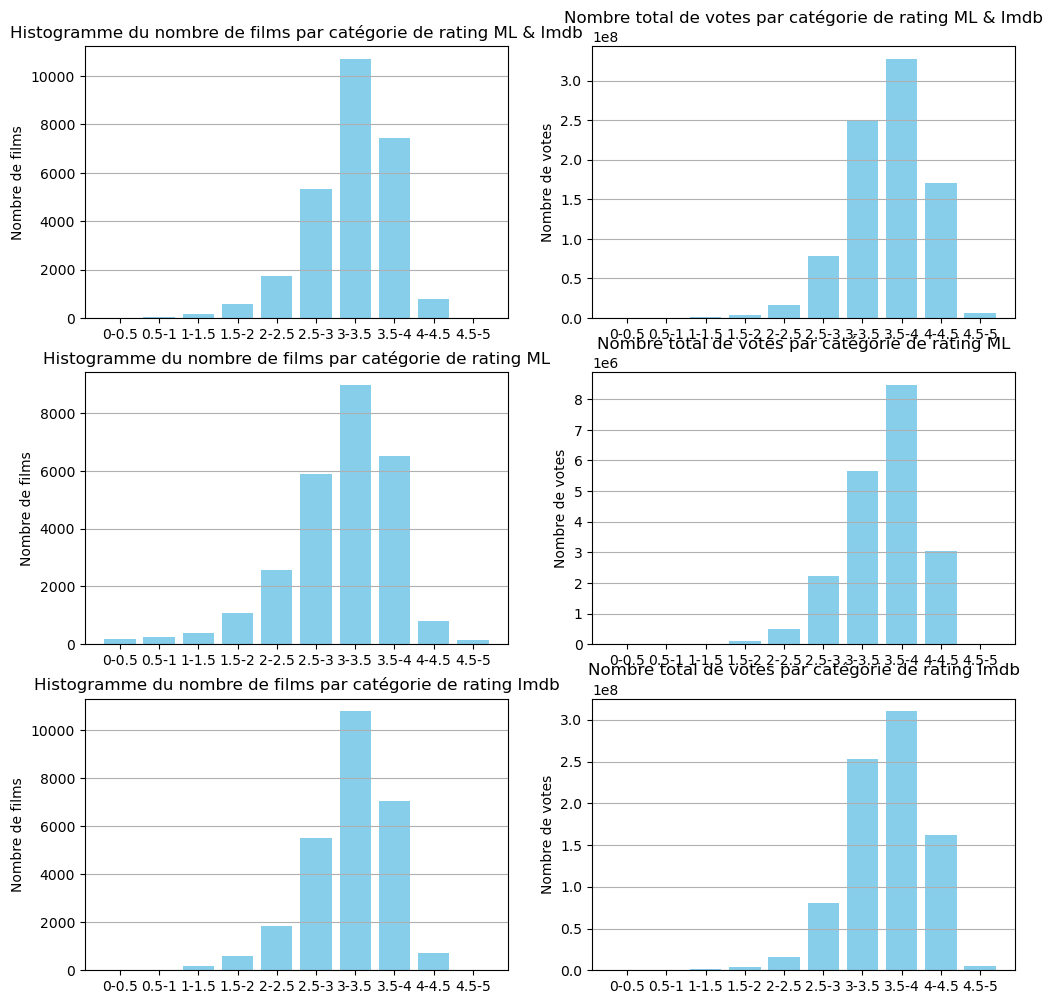

In [37]:
# Graphiques pour analyser l'impact de l'élimination des films avec des notes basses 
# Avec une échelle plus large des ratings 

# Créer des catégories de ratings
ratings_avg_MovieLens_Imdb['rating_category'] = pd.cut(ratings_avg_MovieLens_Imdb['rating_weighted_ML_IMBD'], bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], labels=['0-0.5', '0.5-1', '1-1.5', '1.5-2', '2-2.5', '2.5-3','3-3.5', '3.5-4','4-4.5', '4.5-5'])
ratings_avg_MovieLens_Imdb['rating_category_ML'] = pd.cut(ratings_avg_MovieLens_Imdb['movieLens_avg_rating'], bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], labels=['0-0.5', '0.5-1', '1-1.5', '1.5-2', '2-2.5', '2.5-3','3-3.5', '3.5-4','4-4.5', '4.5-5'])
ratings_avg_MovieLens_Imdb['rating_category_Imdb'] = pd.cut(ratings_avg_MovieLens_Imdb['imdb_rating_normalised'], bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], labels=['0-0.5', '0.5-1', '1-1.5', '1.5-2', '2-2.5', '2.5-3','3-3.5', '3.5-4','4-4.5', '4.5-5'])

# Compter le nombre de films par catégorie de rating
film_counts_by_rating = ratings_avg_MovieLens_Imdb['rating_category'].value_counts().sort_index()
film_counts_by_rating_ML = ratings_avg_MovieLens_Imdb['rating_category_ML'].value_counts().sort_index()
film_counts_by_rating_Imdb = ratings_avg_MovieLens_Imdb['rating_category_Imdb'].value_counts().sort_index()

# Calculer le nombre de votes par catégorie de rating
votes_by_rating = ratings_avg_MovieLens_Imdb.groupby('rating_category')['numVotes_ML_IMBD'].sum().sort_index()
votes_by_rating_ML = ratings_avg_MovieLens_Imdb.groupby('rating_category_ML')['user_count'].sum().sort_index()
votes_by_rating_Imdb = ratings_avg_MovieLens_Imdb.groupby('rating_category_Imdb')['imdb_numVotes'].sum().sort_index()

# Créer des subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Graphiques par nombre des films
# Graphique 1.1 : ML & Imdb
axs[0, 0].bar(film_counts_by_rating.index, film_counts_by_rating, color='skyblue')
axs[0, 0].set_title('Histogramme du nombre de films par catégorie de rating ML & Imdb')
#axs[0, 0].set_xlabel('Catégorie de rating avrg par film (0-5)')
axs[0, 0].set_ylabel('Nombre de films')
axs[0, 0].grid(axis='y')

# Graphique 2.1 : ML
axs[1, 0].bar(film_counts_by_rating_ML.index, film_counts_by_rating_ML, color='skyblue')
axs[1, 0].set_title('Histogramme du nombre de films par catégorie de rating ML')
#axs[1, 0].set_xlabel('Catégorie de rating avrg par film (0-5)')
axs[1, 0].set_ylabel('Nombre de films')
axs[1, 0].grid(axis='y')

# Graphique 3.1 : Imdb
axs[2, 0].bar(film_counts_by_rating_Imdb.index, film_counts_by_rating_Imdb, color='skyblue')
axs[2, 0].set_title('Histogramme du nombre de films par catégorie de rating Imdb')
#axs[2, 0].set_xlabel('Catégorie de rating avrg par film (0-5)')
axs[2, 0].set_ylabel('Nombre de films')
axs[2, 0].grid(axis='y')

# Graphiques par nombre des votes
# Graphique 1.2 : ML & Imdb
axs[0, 1].bar(votes_by_rating.index, votes_by_rating, color='skyblue')
axs[0, 1].set_title('Nombre total de votes par catégorie de rating ML & Imdb')
#axs[0, 1].set_xlabel('Catégorie de rating avrg par film (0-5)')
axs[0, 1].set_ylabel('Nombre de votes')
axs[0, 1].grid(axis='y')

# Graphique 2.2 : ML
axs[1, 1].bar(votes_by_rating_ML.index, votes_by_rating_ML, color='skyblue')
axs[1, 1].set_title('Nombre total de votes par catégorie de rating ML')
#axs[1, 1].set_xlabel('Catégorie de rating avrg par film (0-5)')
axs[1, 1].set_ylabel('Nombre de votes')
axs[1, 1].grid(axis='y')

# Graphique 3.2 : Imdb
axs[2, 1].bar(votes_by_rating_Imdb.index, votes_by_rating_Imdb, color='skyblue')
axs[2, 1].set_title('Nombre total de votes par catégorie de rating Imdb')
#axs[2, 1].set_xlabel('Catégorie de rating avrg par film (0-5)')
axs[2, 1].set_ylabel('Nombre de votes')
axs[2, 1].grid(axis='y')

In [39]:
# Rappel total de films : 26 744

# Filtrer les films avec un rating_weighted_ML_IMBD < 2.5
films_with_low_ratings = ratings_avg_MovieLens_Imdb[ratings_avg_MovieLens_Imdb['rating_weighted_ML_IMBD'] <= 2.5]

# Compter le nombre de films correspondants
nombre_de_films = films_with_low_ratings.shape[0]

print(f"Nombre de films avec un rating_weighted_ML_IMBD <= 2.5 : {nombre_de_films}")

Nombre de films avec un rating_weighted_ML_IMBD <= 2.5 : 2499


In [41]:
# Rappel total de films : 26 744

# Filtrer les films avec un rating_weighted_ML_IMBD < 3
films_with_low_ratings = ratings_avg_MovieLens_Imdb[ratings_avg_MovieLens_Imdb['rating_weighted_ML_IMBD'] <= 3]

# Compter le nombre de films correspondants
nombre_de_films = films_with_low_ratings.shape[0]

print(f"Nombre de films avec un rating_weighted_ML_IMBD <= 3 : {nombre_de_films}")

Nombre de films avec un rating_weighted_ML_IMBD <= 3 : 7835


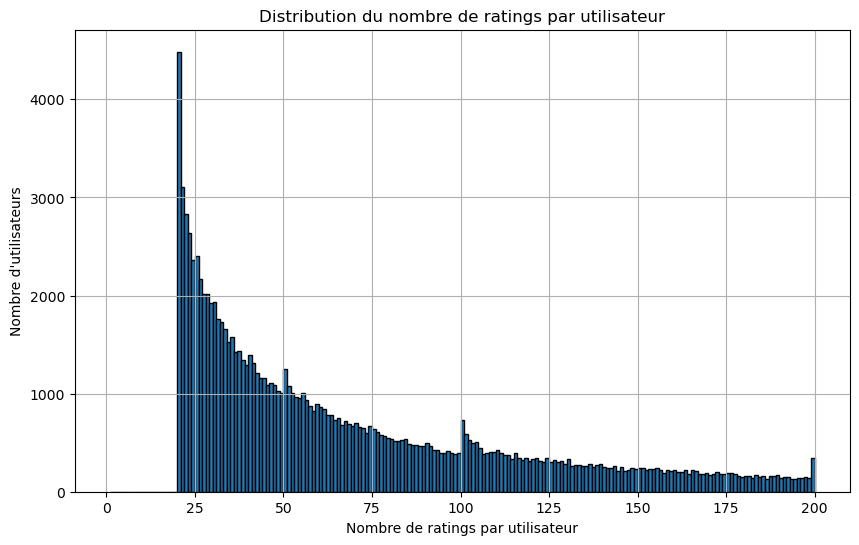

In [43]:
# Analyse par nombre de votes par userId (MovieLens) (1/2)

# Compter le nombre de ratings par utilisateur
user_ratings_count = FC1_movieLens_Imdb['userId'].value_counts()

# Créer l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(user_ratings_count, bins=range(1, 201), edgecolor='black')  # Limité à 200 pour une meilleure visualisation
plt.xlabel('Nombre de ratings par utilisateur')
plt.ylabel('Nombre d\'utilisateurs')
plt.title('Distribution du nombre de ratings par utilisateur')
plt.grid(True)
plt.show()

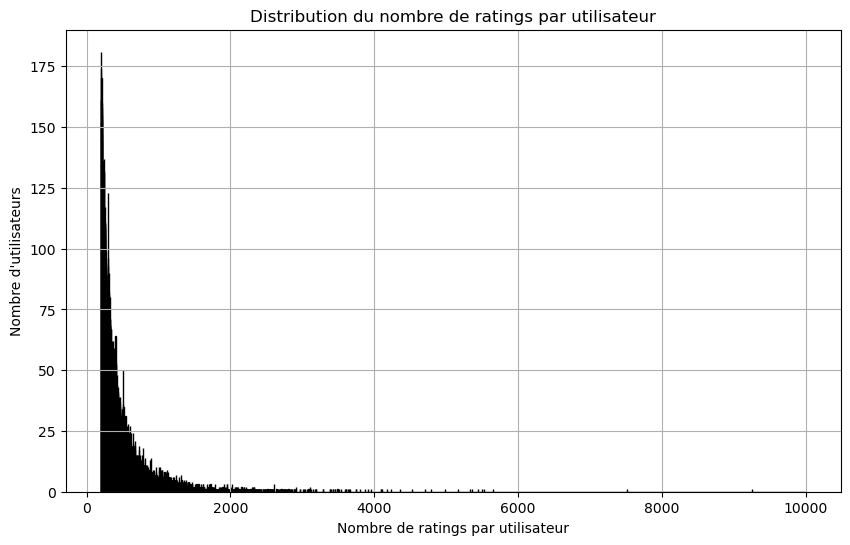

In [45]:
# Analyse par nombre de votes par userId (MovieLens) (2/2)

# Compter le nombre de ratings par utilisateur
user_ratings_count = FC1_movieLens_Imdb['userId'].value_counts()

# Créer l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(user_ratings_count, bins=range(201, 10000), edgecolor='black')  # Limité à 200 pour une meilleure visualisation
plt.xlabel('Nombre de ratings par utilisateur')
plt.ylabel('Nombre d\'utilisateurs')
plt.title('Distribution du nombre de ratings par utilisateur')
plt.grid(True)
plt.show()

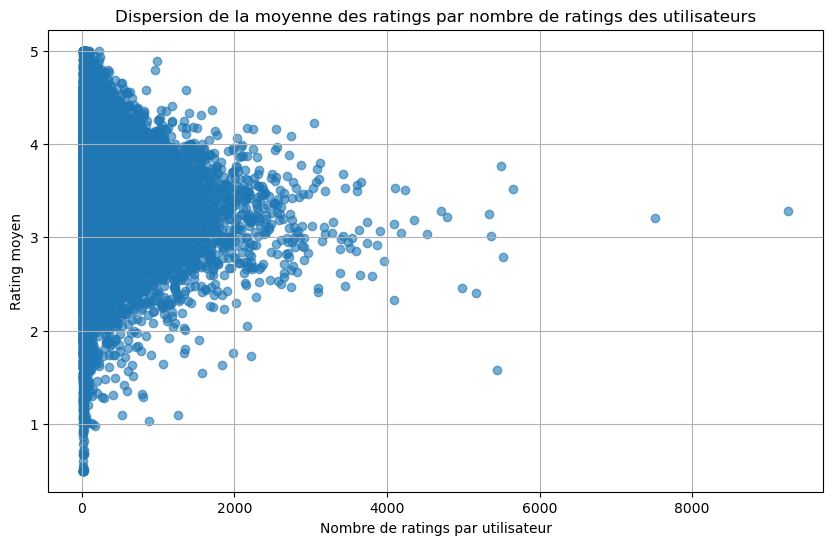

In [57]:
# Compter le nombre de ratings par utilisateur
user_ratings_count = FC1_movieLens_Imdb.groupby('userId').size()

# Calculer la moyenne des ratings par utilisateur
user_avg_ratings = FC1_movieLens_Imdb.groupby('userId')['rating'].mean()

# Fusionner les deux séries pour obtenir un DataFrame
ratings_summary = pd.DataFrame({'num_ratings': user_ratings_count, 'avg_rating': user_avg_ratings})

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.scatter(ratings_summary['num_ratings'], ratings_summary['avg_rating'], alpha=0.6)
plt.xlabel('Nombre de ratings par utilisateur')
plt.ylabel('Rating moyen')
plt.title('Dispersion de la moyenne des ratings par nombre de ratings des utilisateurs')
#plt.xlim(0, 200)  # Limiter l'axe X de 0 à 200
plt.grid(True)

In [49]:
# Compter le nombre de ratings par utilisateur
user_ratings_count = FC1_movieLens_Imdb.groupby('userId').size()

# Obtenir le minimum et le maximum de ratings par utilisateur
min_ratings = user_ratings_count.min()
max_ratings = user_ratings_count.max()

# Afficher les résultats
print(f"Nombre minimum de ratings par un utilisateur: {min_ratings}")
print(f"Nombre maximum de ratings par un utilisateur: {max_ratings}")

Nombre minimum de ratings par un utilisateur: 20
Nombre maximum de ratings par un utilisateur: 9254


In [59]:
# Analyse de combien des usersIds resteraient si on sélectionne éliminer certaines par quantité de rating

# Sachant qu'on a en total dans la table movielens 138 493 userids

def analyze_ratings1(user_ratings_count, FC1_movieLens_Imdb, min_ratings, max_ratings):
    # Filtrer les utilisateurs ayant donné entre min_ratings et max_ratings
    selected_users = user_ratings_count[(user_ratings_count >= min_ratings) & (user_ratings_count <= max_ratings)]

    # Rappel des utilisateurs totaux
    unique_userIds = FC1_movieLens_Imdb['userId'].nunique()
    print(f'Rappel de combien des userIds la base de données présente : {unique_userIds}')

    # Nombre d'utilisateurs ayant donné entre min_ratings et max_ratings
    num_users = selected_users.count()
    print(f"Nombre des users ont >= {min_ratings} ratings et <= {max_ratings} ratings : {num_users}")

    # Pourcentage des userIds qui restent 
    percent_remaining_userIds = (num_users/unique_userIds) * 100
    print(f"% des usersids restantes : {percent_remaining_userIds:.2f}%")
    
    # Nombre de lignes à éliminer
    num_rows_to_remove = selected_users.sum()
    print(f"Nombre des lignes qui seraient éliminées : {num_rows_to_remove}")
    
    # Nombre de lignes restantes
    num_rows_remaining = len(FC1_movieLens_Imdb) - num_rows_to_remove
    print(f"Nombre des lignes restantes : {num_rows_remaining}")
    
    # Pourcentage des lignes restantes
    percent_remaining = (1 - (num_rows_to_remove / len(FC1_movieLens_Imdb))) * 100
    print(f"% des lignes restantes : {percent_remaining:.2f}%")
    
    return num_users, unique_userIds, percent_remaining_userIds, num_rows_to_remove, num_rows_remaining, percent_remaining

# Appel de la fonction avec les valeurs spécifiques
user_ratings_count = FC1_movieLens_Imdb.groupby('userId').size()
analyze_ratings1(user_ratings_count, FC1_movieLens_Imdb, 500, 700)


Rappel de combien des userIds la base de données présente : 138493
Nombre des users ont >= 500 ratings et <= 700 ratings : 3502
% des usersids restantes : 2.53%
Nombre des lignes qui seraient éliminées : 2043677
Nombre des lignes restantes : 17956586
% des lignes restantes : 89.78%


(3502, 138493, 2.5286476572823178, 2043677, 17956586, 89.7817493699958)

In [61]:
# Analyse de films resteraient si on sélectionne les userid avec le nombre de ratings définis

# Calcul des nombre des films qui restent 
def analyze_ratings2(user_ratings_count, FC1_movieLens_Imdb, min_ratings, max_ratings):
    # Filtrer les utilisateurs ayant donné entre min_ratings et max_ratings
    selected_users = user_ratings_count[(user_ratings_count >= min_ratings) & (user_ratings_count <= max_ratings)].index
    
    # Filtrer les données pour ces utilisateurs
    filtered_ratings = FC1_movieLens_Imdb[FC1_movieLens_Imdb['userId'].isin(selected_users)]
    
    # Compter les films uniques notés par ces utilisateurs
    unique_films_count = filtered_ratings['imdbId'].nunique()
    print(f"Nombre de films uniques notés par des utilisateurs ayant donné entre {min_ratings} et {max_ratings} notes : {unique_films_count}")
    
    # Rappel de combien de films la base de données totaux
    imdbId_uniques = FC1_movieLens_Imdb['imdbId'].nunique()
    print(f'Rappel de combien des films la base de données présente : {imdbId_uniques}')

     # Pourcentage des films restantes
    percent_remaining = (unique_films_count / imdbId_uniques) * 100
    print(f"% des films restantes : {percent_remaining:.2f}%")
    
    return unique_films_count, imdbId_uniques, percent_remaining

# Appel de la fonction avec les valeurs spécifiques
user_ratings_count = FC1_movieLens_Imdb.groupby('userId').size()
analyze_ratings2(user_ratings_count, FC1_movieLens_Imdb, 500, 700)

Nombre de films uniques notés par des utilisateurs ayant donné entre 500 et 700 notes : 16346
Rappel de combien des films la base de données présente : 26744
% des films restantes : 61.12%


(16346, 26744, 61.12025127131319)

In [65]:
# Pour l'extraction des données pour le modèle  (Filtrage de la base de données)

# Compter le nombre de ratings par utilisateur
user_ratings_count = FC1_movieLens_Imdb['userId'].value_counts()

# Filtrer les utilisateurs ayant donné entre 500 et 700 ratings
selected_users = user_ratings_count[(user_ratings_count >= 500) & (user_ratings_count <= 700)].index

# Extraire les données correspondantes du DataFrame
filtered_data = FC1_movieLens_Imdb[FC1_movieLens_Imdb['userId'].isin(selected_users)]

filtered_data.info()
filtered_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2043677 entries, 960 to 19998298
Data columns (total 6 columns):
 #   Column              Dtype  
---  ------              -----  
 0   userId              int64  
 1   imdbId              int64  
 2   rating              float64
 3   title_name          string 
 4   imdb_averageRating  float64
 5   imdb_numVotes       Int64  
dtypes: Int64(1), float64(2), int64(2), string(1)
memory usage: 111.1 MB


,userId,imdbId,rating,title_name,imdb_averageRating,imdb_numVotes
960,11,114709,4.5,Toy Story,8.3,1088953
961,11,113189,2.5,GoldenEye,7.2,273041
962,11,112281,3.5,Ace Ventura: When Nature Calls,6.4,237008
963,11,114746,5.0,Twelve Monkeys (a.k.a. 12 Monkeys),8.0,654005
964,11,112697,4.5,Clueless,6.9,253424
